In [1]:
import os
from pathlib import Path

In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from matplotlib import pyplot as plt

In [5]:
os.chdir(Path(os.getcwd()).parent)

In [6]:
import pandas as pd

In [7]:
from moddata import load_data

## 0. Data Import & Splitting Into Train, Validation and Test DataSets

In [8]:
data = load_data("bankchurn")

In [9]:
print(f"Number of observations in the data set: {data.shape[0]:,}")

Number of observations in the data set: 10,000


In [10]:
sample_size = 1_000

In [11]:
data, test_data = train_test_split(data, train_size=sample_size, stratify=data["churn"])

## 1. Preliminary EDA

In [12]:
data = data.drop(columns=["customer_id"])

In [13]:
data.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
9161,621,France,Male,40,10,163823.37,1,0,0,89519.47,0
7844,612,France,Female,38,1,0.00,2,1,1,9209.21,0
4533,850,Spain,Male,39,6,206014.94,2,0,1,42774.84,1
927,639,Germany,Male,38,5,130170.82,1,1,1,149599.62,0
9980,741,Spain,Male,35,6,74371.49,1,0,0,99595.67,0


In [14]:
X, y = data.loc[:, data.columns != "churn"], data.loc[:, ["churn"]]

In [15]:
X.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,651.18200,38.684000,5.179000,77546.225520,1.504000,0.698000,0.493000,102081.88572
std,99.61512,10.283963,2.875278,61262.379374,0.600287,0.459355,0.500201,56516.68655
min,350.00000,19.000000,0.000000,0.000000,1.000000,0.000000,0.000000,487.30000
25%,582.00000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,52869.39750
50%,654.00000,37.000000,5.000000,96806.205000,1.000000,1.000000,0.000000,103559.52500
75%,725.00000,43.000000,8.000000,128394.050000,2.000000,1.000000,1.000000,147808.84250
max,850.00000,81.000000,10.000000,206014.940000,4.000000,1.000000,1.000000,199761.29000


### 1.1. churn vs gender

In [16]:
ct_gender = pd.crosstab(index=X["gender"], columns=y["churn"], normalize="index", margins=True)

In [17]:
ct_gender

churn,0,1
gender,,
Female,0.777283,0.222717
Male,0.811252,0.188748
All,0.796000,0.204000


### 1.2. country vs churn

In [18]:
ct_country = pd.crosstab(index=X["country"], columns=y["churn"], normalize="index", margins=True)

In [19]:
ct_country

churn,0,1
country,,
France,0.845098,0.154902
Germany,0.664093,0.335907
Spain,0.835498,0.164502
All,0.796000,0.204000


### 1.3. active member vs churn

In [20]:
ct_active_member = pd.crosstab(index=X["active_member"], columns=y["churn"], normalize="index", margins=True)

In [21]:
ct_active_member

churn,0,1
active_member,,
0,0.721893,0.278107
1,0.872211,0.127789
All,0.796000,0.204000


### 1.4. credit_score distribution

<Axes: >

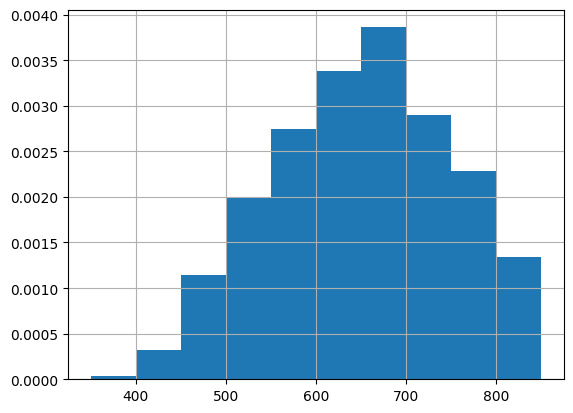

In [22]:
X["credit_score"].hist(density=True)

### 1.5. estimated_salary distribution

In [23]:
X["estimated_salary"].describe()

count      1000.00000
mean     102081.88572
std       56516.68655
min         487.30000
25%       52869.39750
50%      103559.52500
75%      147808.84250
max      199761.29000
Name: estimated_salary, dtype: float64

<Axes: >

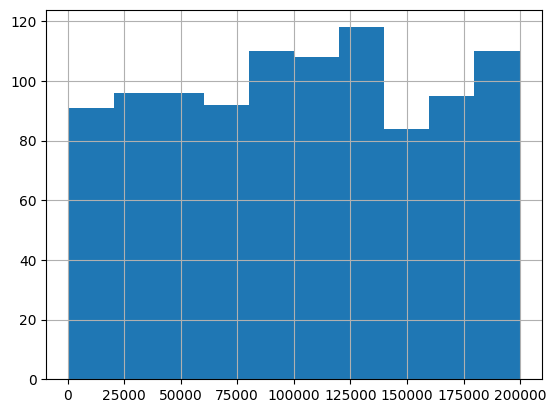

In [24]:
X["estimated_salary"].hist(density=False)

### 1.6. balance dist

<Axes: >

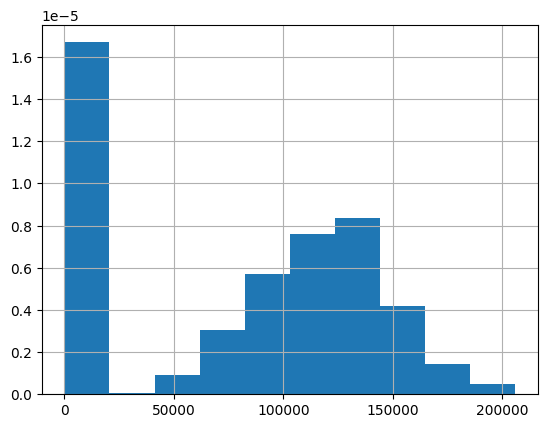

In [25]:
X["balance"].hist(density=True)

In [26]:
X[X["balance"] == 0.0].shape[0] / X.shape[0]

0.344

### 1.7. credit_score vs estimated_salary

<Axes: xlabel='estimated_salary', ylabel='credit_score'>

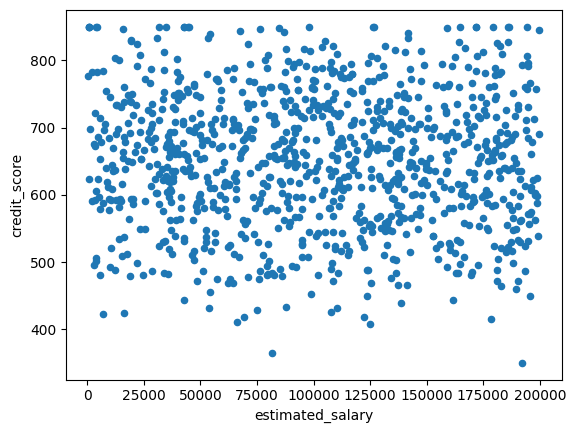

In [27]:
X.plot.scatter(x="estimated_salary", y="credit_score")

### 1.8. age distribution

<Axes: >

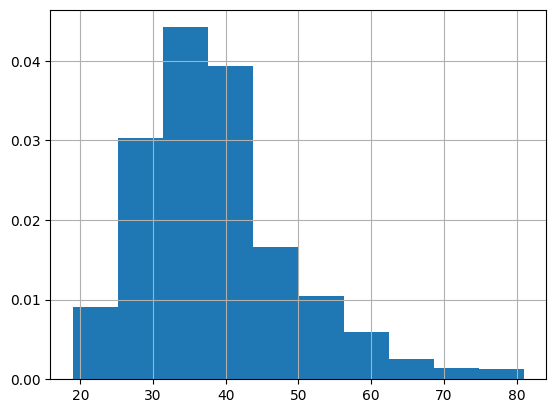

In [28]:
X["age"].hist(density=True)

## 2. Transform Regressors

In [29]:
X.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
9161,621,France,Male,40,10,163823.37,1,0,0,89519.47
7844,612,France,Female,38,1,0.00,2,1,1,9209.21
4533,850,Spain,Male,39,6,206014.94,2,0,1,42774.84
927,639,Germany,Male,38,5,130170.82,1,1,1,149599.62
9980,741,Spain,Male,35,6,74371.49,1,0,0,99595.67


### 2.1. Categorical, nominal, low number of levels

Regressors: 
1. country
2. gender
3. products_number
4. credit_card
5. active_member

are left unchanged.

### 2.2. estimated_salary is mapped to [0, 1]

In [30]:
mimax_scaler = MinMaxScaler()

In [31]:
X["estimated_salary"] = mimax_scaler.fit_transform(X[["estimated_salary"]])

/var/folders/pn/mflr608s6vdbf4ccdqtxcldw0000gn/T/ipykernel_86240/411901416.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["estimated_salary"] = mimax_scaler.fit_transform(X[["estimated_salary"]])


<Axes: >

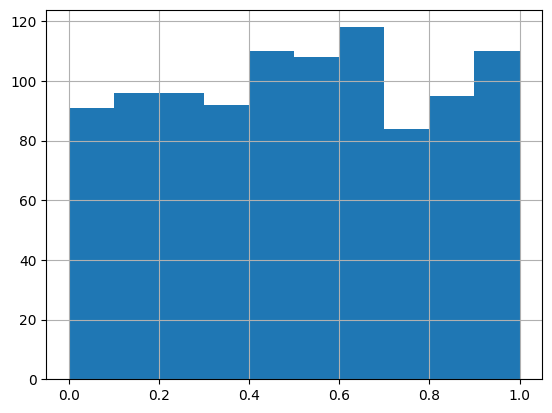

In [32]:
X["estimated_salary"].hist()

### 2.3. credit_score is standardized

### 2.4. 

In [33]:
X

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
9161,621,France,Male,40,10,163823.37,1,0,0,0.446783
7844,612,France,Female,38,1,0.00,2,1,1,0.043768
4533,850,Spain,Male,39,6,206014.94,2,0,1,0.212208
927,639,Germany,Male,38,5,130170.82,1,1,1,0.748278
9980,741,Spain,Male,35,6,74371.49,1,0,0,0.497347
...,...,...,...,...,...,...,...,...,...,...
1195,676,France,Female,43,2,0.00,1,1,1,0.274156
2211,717,France,Male,40,0,98241.04,1,1,0,0.554010
947,715,France,Female,38,5,118590.41,1,1,1,0.026079
3043,636,France,Female,38,1,0.00,1,1,0,0.223452


### 2.1. Bin credit_score

### 2.2. Bin balance